# Exercise project 1 – ANN for Regression from Kaggle Approach with Visualizations


This notebook is an almost one-to-one copied from Kaggle, before finding my own dataset and implementing my own regression model, I wanted to run a pre-existing one to learn

https://www.kaggle.com/code/abrahamanderson/artificial-neural-networks-for-regression/notebook


### Step 0: Importing needed libraries and loading the dataset



In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
folder_path = '/content/drive/MyDrive/deeplearning2024_VincenzinaSoos/ex_1'
os.chdir(folder_path)

In [ ]:
df = pd.read_csv("data/Folds5x2_pp.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Here, I renamed the columns from their abbrivated form so it more clear what I am working with

In [ ]:
df.rename(columns={'AT': 'Average Temperature', 'V': 'Exhaust Vacuum','AP': 'Ambient Pressure',
                   'RH': 'Relative Humidity ','PE': 'Net Hourly Electrical Energy Output'}, inplace=True)
df.head()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Step 1: Data analysis and visualisations

In [ ]:
df.isnull().sum()

,0
Average Temperature,0
Exhaust Vacuum,0
Ambient Pressure,0
Relative Humidity,0
Net Hourly Electrical Energy Output,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Average Temperature                  9568 non-null   float64
 1   Exhaust Vacuum                       9568 non-null   float64
 2   Ambient Pressure                     9568 non-null   float64
 3   Relative Humidity                    9568 non-null   float64
 4   Net Hourly Electrical Energy Output  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.describe()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


`df.corr()`

shows strong positive correlation between Net Hourly Electrical Energy Output and Ambient Pressure

strong negative correlation between Net Hourly Electrical Energy Output and Average Temperature or Exhaust Vacuum

In [ ]:
df.corr()["Net Hourly Electrical Energy Output"].sort_values(ascending=False)

,Net Hourly Electrical Energy Output
Net Hourly Electrical Energy Output,1.000000
Ambient Pressure,0.518429
Relative Humidity,0.389794
Exhaust Vacuum,-0.869780
Average Temperature,-0.948128


**Correlation Matrix**

<Axes: >

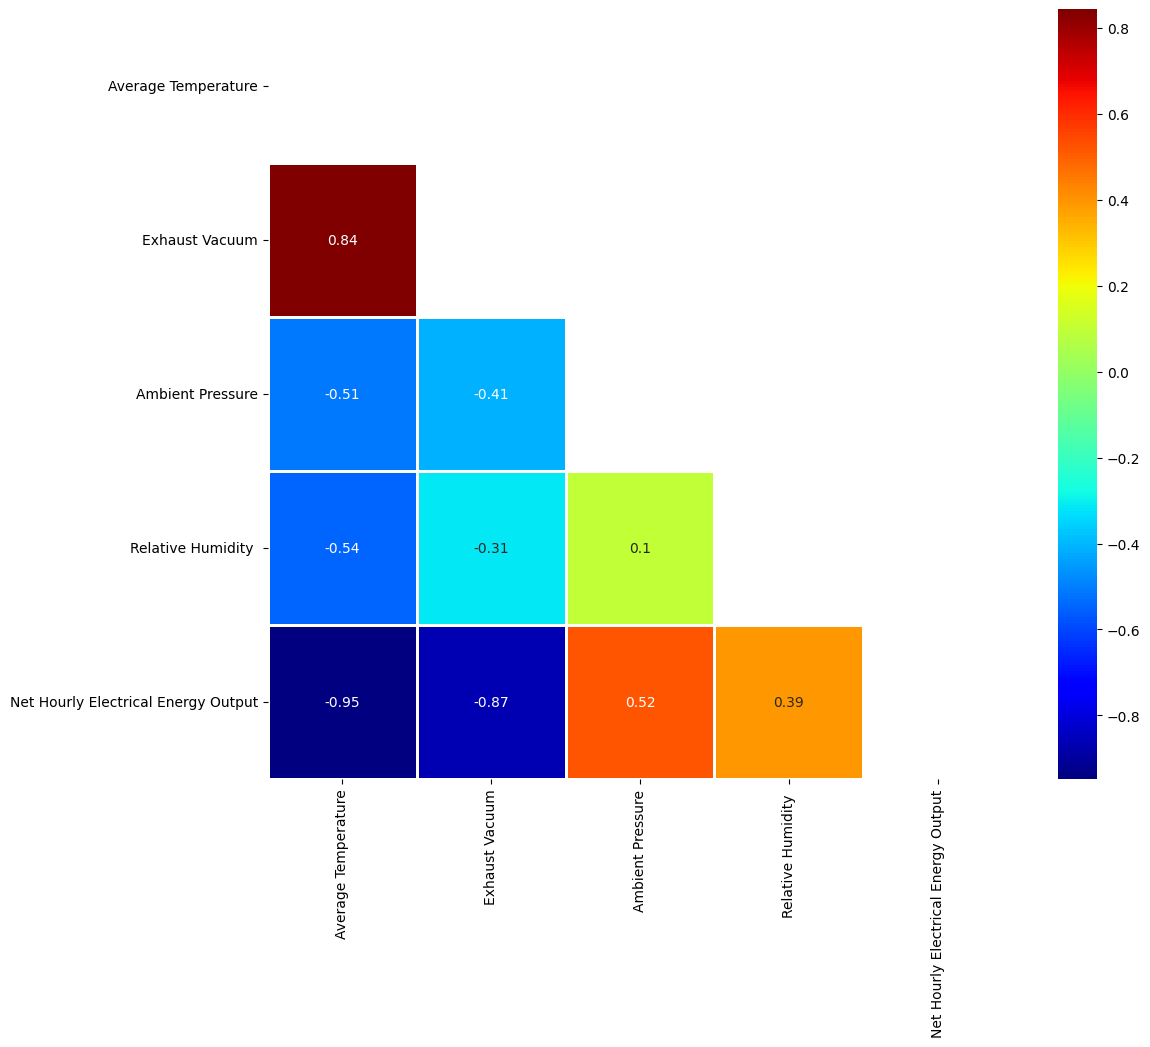

In [ ]:
plt.figure(figsize=(12,10))
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

**Histograms**



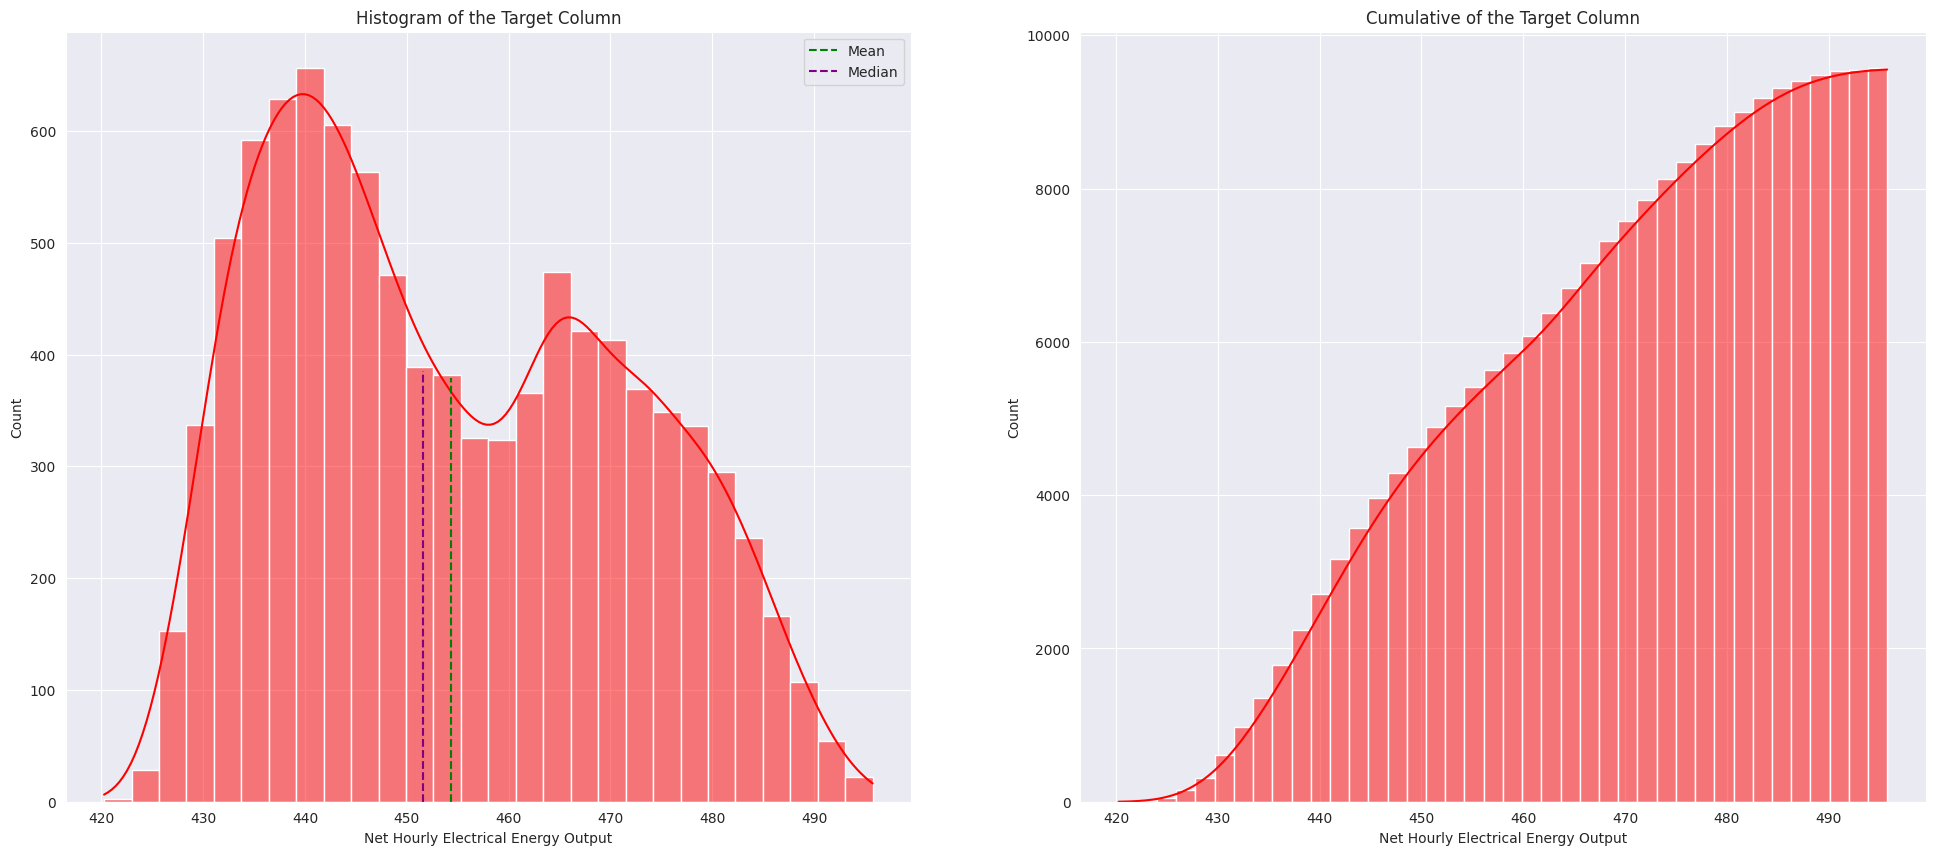

In [ ]:
sns.set_style("darkgrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# First histogram
sns.histplot(data=df, x="Net Hourly Electrical Energy Output", color="red", kde=True, ax=ax1)
ax1.axvline(x=df["Net Hourly Electrical Energy Output"].mean(), ymax=0.55, color="green", linestyle='--', label="Mean")
ax1.axvline(x=df["Net Hourly Electrical Energy Output"].median(), ymax=0.56, color="purple", linestyle='--', label="Median")
ax1.legend()
ax1.set_title("Histogram of the Target Column")

# Second histogram
sns.histplot(df["Net Hourly Electrical Energy Output"], kde=True, bins=40, color="red", cumulative=True, ax=ax2)
ax2.set_title("Cumulative of the Target Column")

plt.show()

**Scatterplot Matrix**

pairplot with 'auto' diagonal and no corner option


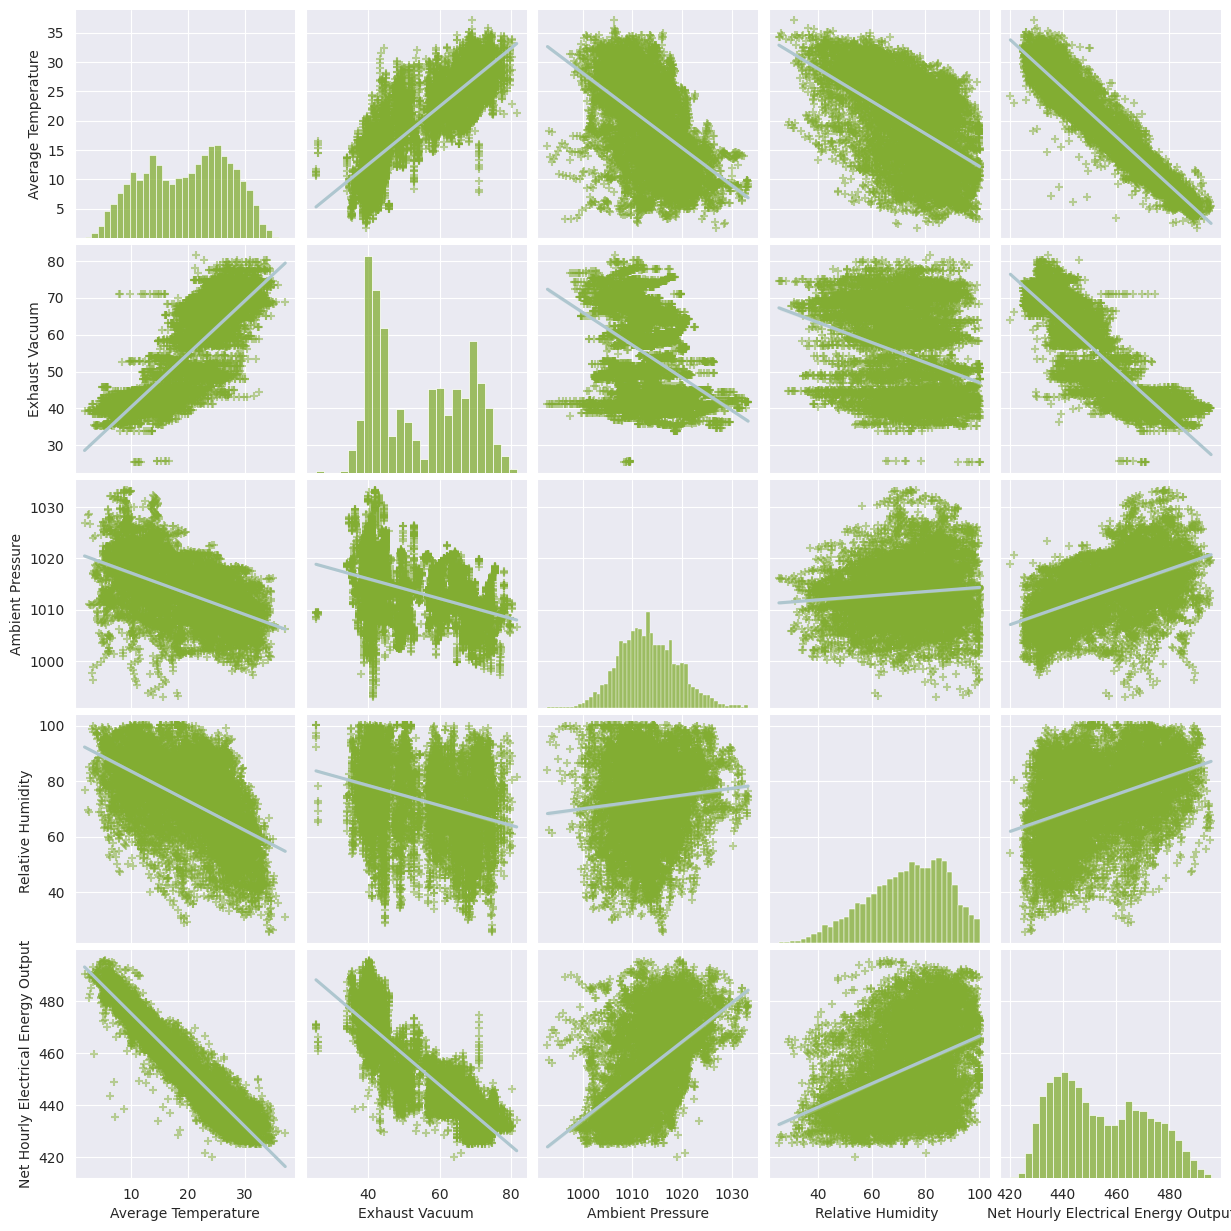

pairplot with 'kde' diagonal and corner option enabled


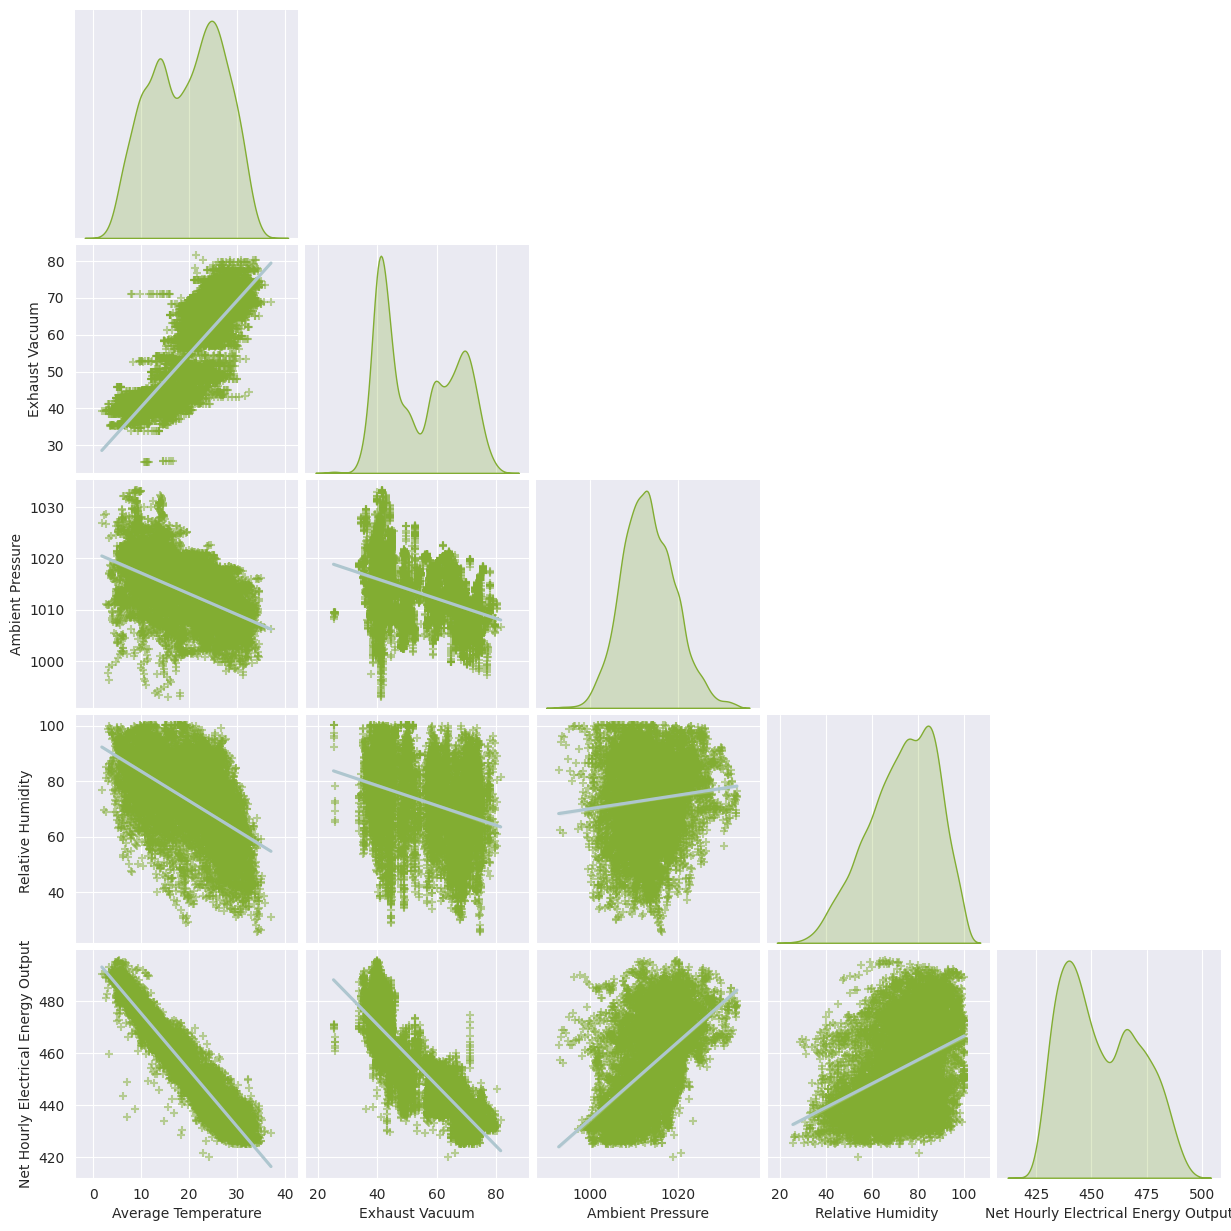

In [ ]:
# First pairplot with 'auto' diagonal and no corner option
print("pairplot with 'auto' diagonal and no corner option")
sns.pairplot(df, markers="+", kind='reg', diag_kind="auto",
             plot_kws={'line_kws':{'color':'#aec6cf'},
                       'scatter_kws': {'alpha': 0.5, 'color': '#82ad32'}},
             diag_kws={'color': '#82ad32'})
plt.show()

print("pairplot with 'kde' diagonal and corner option enabled")
# Second pairplot with 'kde' diagonal and corner option enabled
sns.pairplot(df, markers="+", kind='reg', diag_kind="kde",
             plot_kws={'line_kws':{'color':'#aec6cf'},
                       'scatter_kws': {'alpha': 0.5, 'color': '#82ad32'}},
             corner=True,
             diag_kws={'color': '#82ad32'})
plt.show()

**Scatter Plot**

Average Temperature / Net Hourly Electrical Energy Output

<Axes: xlabel='Average Temperature', ylabel='Net Hourly Electrical Energy Output'>

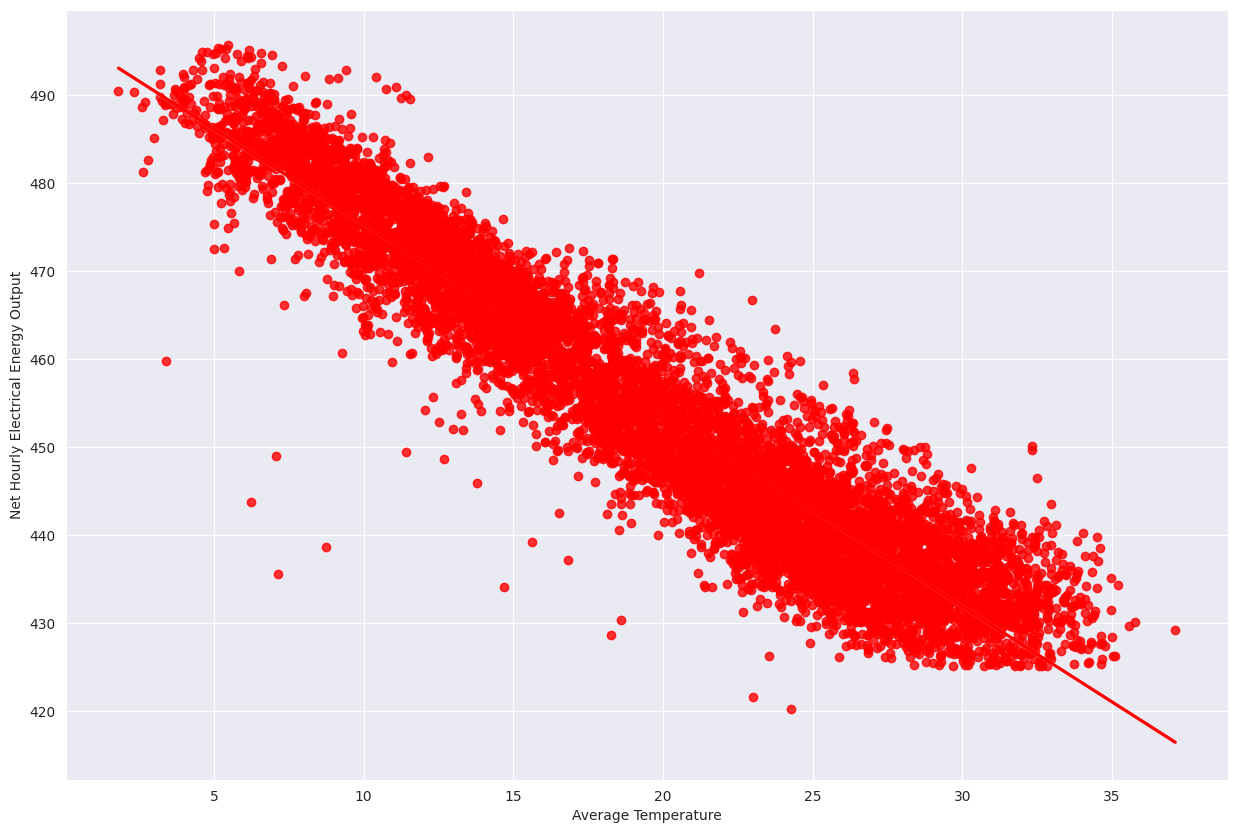

In [ ]:
plt.figure(figsize = (15,10))
sns.regplot(data=df, x="Average Temperature", y="Net Hourly Electrical Energy Output",color="red")

**Scatter Plot**

Exhaust vacuum / Net Hourly Electrical Energy Output

<Axes: xlabel='Exhaust Vacuum', ylabel='Net Hourly Electrical Energy Output'>

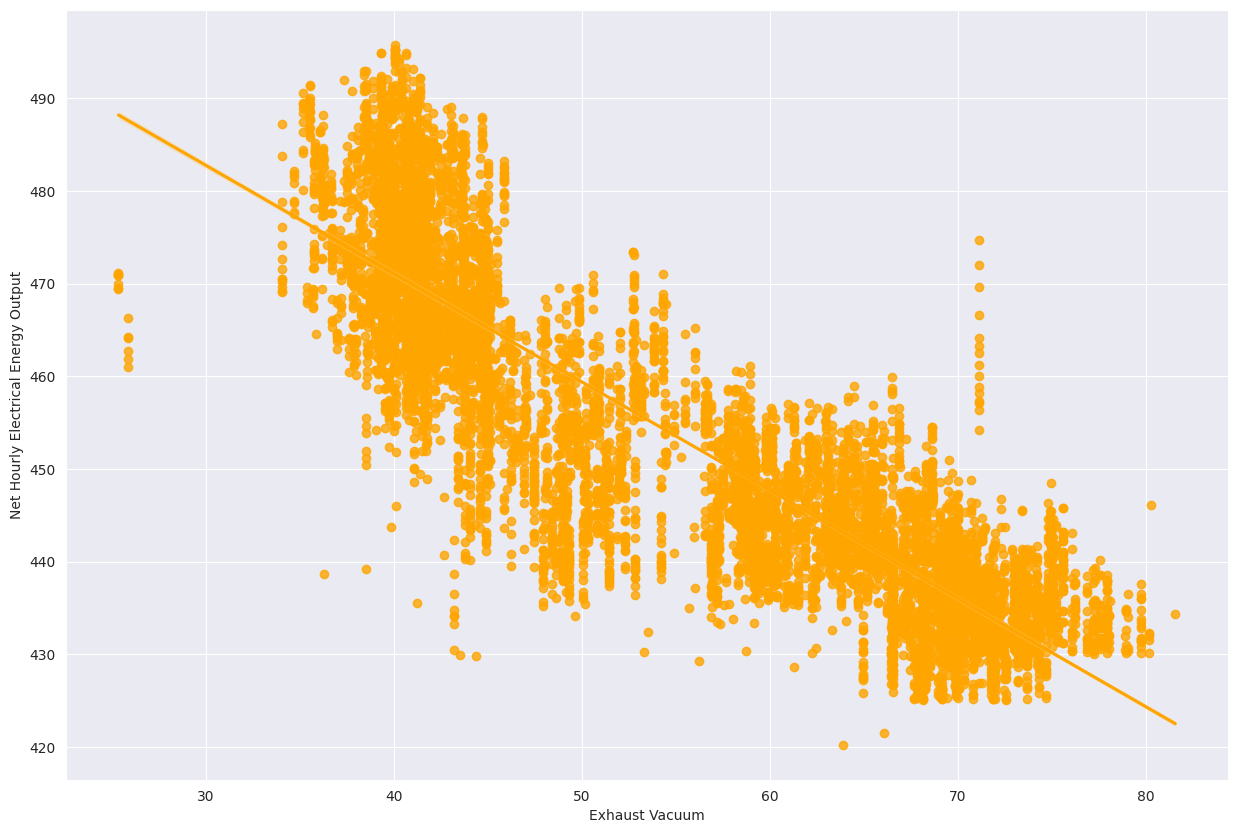

In [ ]:
plt.figure(figsize = (15,10))
sns.regplot(data=df, x="Exhaust Vacuum", y="Net Hourly Electrical Energy Output",color="orange")

**Scatter Plot**

Ambient Pressure / Net Hourly Electrical Energy Output

<Axes: xlabel='Ambient Pressure', ylabel='Net Hourly Electrical Energy Output'>

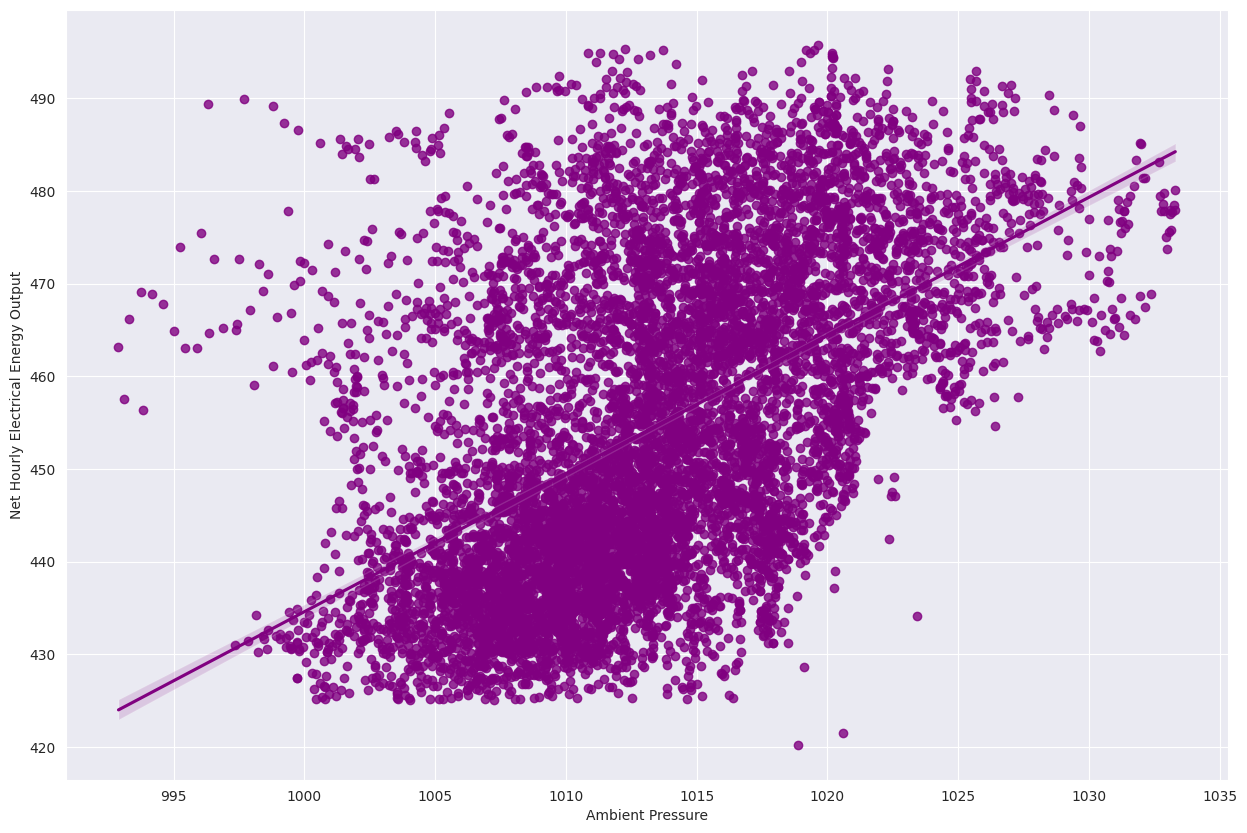

In [ ]:
plt.figure(figsize = (15,10))
sns.regplot(data=df, x="Ambient Pressure", y="Net Hourly Electrical Energy Output",color="purple")

### Step 2: Data pre-processing

dropping target value column

In [ ]:
X = df.drop("Net Hourly Electrical Energy Output", axis=1).values
y = df["Net Hourly Electrical Energy Output"].values
print(X)
print(y)

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]
[480.48 445.75 438.76 ... 465.96 450.93 451.67]


splitting the data into train and test (80/20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


using standard scaler to scale the data for the model for smoother processsing

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[ 0.74805289  0.72006931 -0.32660017 -0.49711722]
 [ 0.86181948  1.26515721 -0.98521113  0.8181501 ]
 [ 0.93409473  1.52314975  0.32523844  0.80167494]
 ...
 [-0.22097078 -0.834965    0.36756563 -0.83554456]
 [ 0.94747903  1.14245344 -0.41971997 -0.45455637]
 [-1.77355014 -1.19049131  1.92520594  0.91837402]]
[[ 1.34499288  0.23869298 -1.28658067 -1.10532538]
 [ 0.81095912  1.36269098 -0.74140656  0.26485915]
 [-0.2437241  -0.73900436  1.99970178 -0.19713193]
 ...
 [-0.67068342 -1.15902881 -0.29951077 -0.10651852]
 [ 1.31420898  1.33752097 -0.87346737 -0.44288647]
 [-0.2611237  -0.27021304  0.37433797  1.10646548]]


### Step 3: Model Architecture

In [ ]:
!pip install -q tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(optimizer="adam",loss="mean_squared_error")
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)

In [ ]:
ann.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test),callbacks=early_stopping)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 206567.5938 - val_loss: 203001.0469
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 200328.1250 - val_loss: 186518.3438
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 178073.0781 - val_loss: 146006.0000
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 132412.0625 - val_loss: 92916.5547
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 80801.8359 - val_loss: 52895.6094
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 46676.4062 - val_loss: 31520.8145
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 29079.1914 - val_loss: 20794.9805
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 19447.2305 - val_loss: 15394.6318
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 14662.5039 - val_loss: 11857.5059
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 11534.9541 - val_loss: 8918.6211
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 

### Step 4: Model Evaluation

In [ ]:
pd.DataFrame(ann.history.history)

,loss,val_loss
0,205600.593750,203001.046875
1,196557.218750,186518.343750
2,168430.640625,146006.000000
3,119313.320312,92916.554688
4,70980.898438,52895.609375
...,...,...
63,19.820860,18.188938
64,19.782701,19.023214
65,19.739883,18.397968
66,19.663582,18.661348


<Axes: >

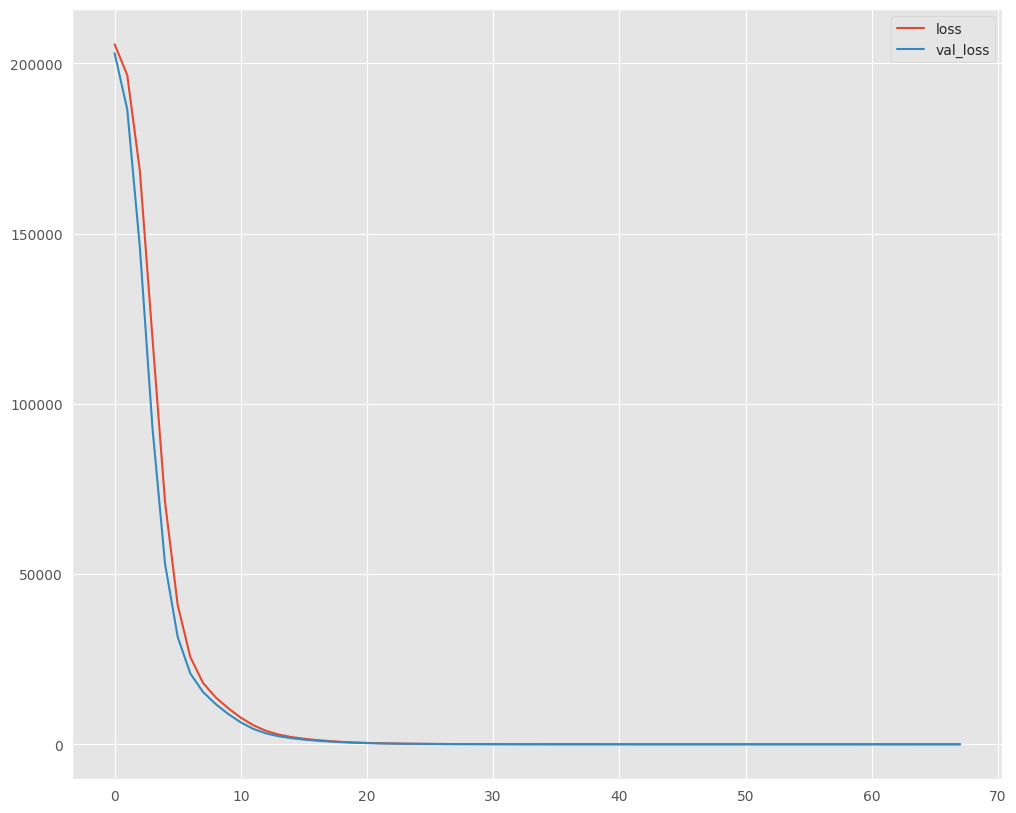

In [ ]:
plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))

In [ ]:
ann.evaluate(X_train,y_train)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.4595


19.492488861083984

In [ ]:
ann.evaluate(X_test,y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9628


18.30010223388672

In [ ]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Real Values,Predictions
0,433.27,436.711029
1,438.16,437.233307
2,458.42,459.336212
3,480.82,476.398346
4,441.41,437.663361
...,...,...
1909,456.70,449.465698
1910,438.04,433.213837
1911,467.80,468.046783
1912,437.14,432.699066


In [ ]:
print(y_test.shape)
print(predictions.shape)

(1914,)
(1914, 1)


Text(0, 0.5, 'Actual Values')

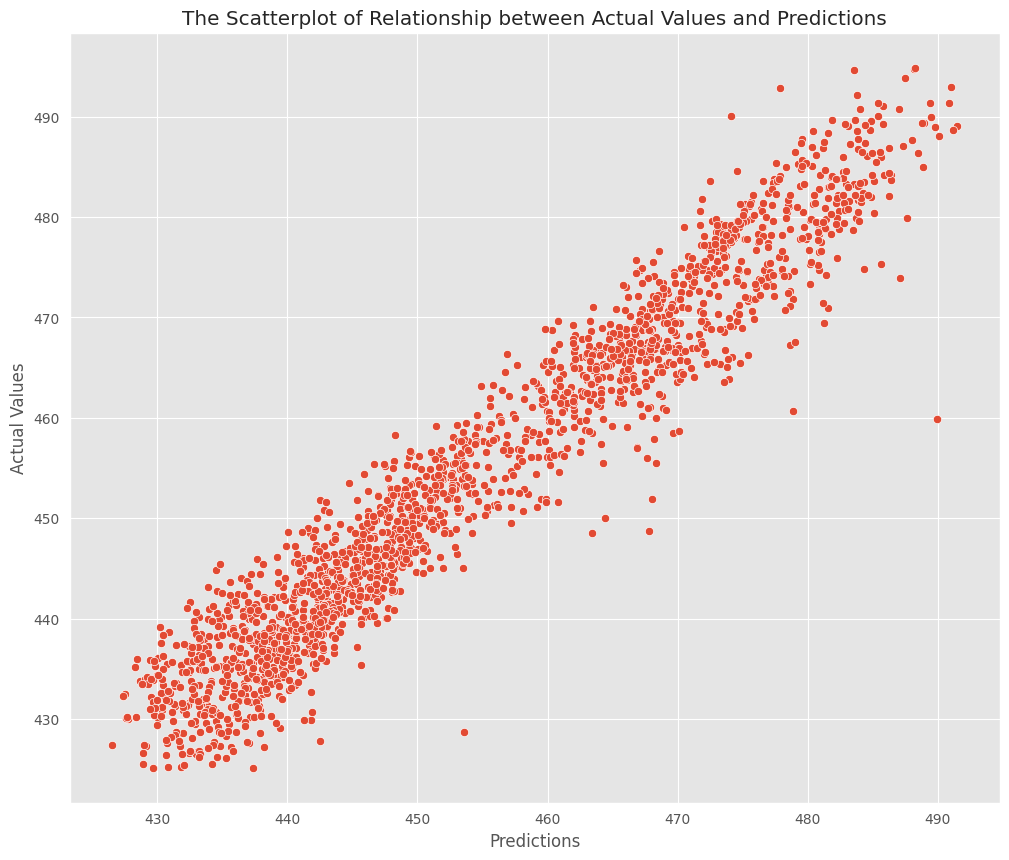

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=np.ravel(predictions), y=y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [ ]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 3.3848889817065455
MSE: 18.300100401197653
RMSE: 4.277861662232389


In [ ]:
metrics.explained_variance_score(y_test,predictions)

0.9360942986650721